In [1]:
# 모듈 임포트
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# 트레이닝 데이터 로드
x_data = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_activity.csv').sort_values(by='acc_id', ascending=True)
y_data = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\train\\train_label.csv').sort_values(by='acc_id', ascending=True)

In [18]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440323 entries, 427043 to 315904
Data columns (total 38 columns):
wk                          440323 non-null int64
acc_id                      440323 non-null object
cnt_dt                      440323 non-null int64
play_time                   440323 non-null float64
npc_exp                     440323 non-null float64
npc_hongmun                 440323 non-null float64
quest_exp                   440323 non-null float64
quest_hongmun               440323 non-null float64
item_hongmun                440323 non-null float64
game_combat_time            440323 non-null float64
get_money                   440323 non-null float64
duel_cnt                    440323 non-null float64
duel_win                    440323 non-null float64
partybattle_cnt             440323 non-null float64
partybattle_win             440323 non-null float64
cnt_enter_inzone_solo       440323 non-null float64
cnt_enter_inzone_light      440323 non-null float64
cnt_e

In [3]:
# 트레이닝데이터 아이디별로 그룹화 및 평균
# 데이터의 시계열 특성이 사라지지만, 빨리 단순 회귀 모형을 볼 수 있음
x_data = x_data.groupby(by='acc_id').mean().values[:, 2:]
y_data = y_data.label.values

In [4]:
#트레이닝셋, 발리데이션셋 구분
x_train = x_data[0:int(0.7 * len(x_data)),:]
y_train = y_data[0:int(0.7 * len(x_data))]

x_cv = x_data[int(0.7 * len(x_data)):,:]
y_cv = y_data[int(0.7 * len(x_data)):]

### 의사결정나무
---

In [5]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=0)

In [6]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [7]:
print("훈련 세트 정확도: {:.3f}".format(tree.score(x_train, y_train)))

훈련 세트 정확도: 0.918


In [8]:
print("크로스발리데이션 세트 정확도: {:.3f}".format(tree.score(x_cv, y_cv)))

크로스발리데이션 세트 정확도: 0.620


In [9]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[2.20966413e-01 2.10657349e-02 2.18954458e-02 3.35071626e-02
 4.33474455e-02 1.13837048e-01 2.13866604e-01 4.14242216e-02
 1.82320158e-03 1.30064697e-03 2.23400982e-03 3.32132424e-03
 8.31400317e-03 7.20969936e-03 2.12763106e-03 9.54635168e-03
 2.57334721e-03 3.18287263e-03 3.73176786e-04 2.81657906e-02
 3.34401682e-02 1.14694678e-03 8.51015860e-03 2.13003882e-03
 1.24103445e-02 1.67040463e-04 2.07710535e-02 5.24490112e-02
 4.47851042e-03 2.52169542e-02 1.05894205e-02 1.93422325e-04
 3.65271256e-02 5.12387111e-04 1.13752871e-02]


In [13]:
def plot_feature_importances(model):
    n_features = 35
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(range(35)))
    plt.xlabel("feature importances")
    plt.ylabel("feature index")
    plt.ylim(-1, n_features)

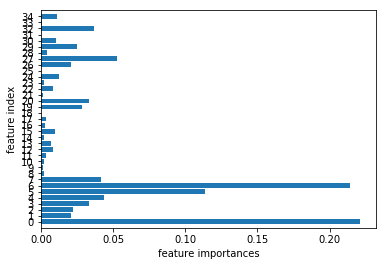

In [14]:
plot_feature_importances(tree)

### 테스트 데이터 로드
---

In [14]:
# 테스트 데이터 로드
x_test_temp = pd.read_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\test_activity.csv').sort_values(by='acc_id', ascending=True)

In [16]:
#value
x_test = x_test_temp.groupby(by='acc_id').mean().values

In [36]:
#예측
label = tree.predict(x_test)

In [37]:
acc_id = x_test_temp.groupby(by='acc_id').mean().index

data = {'acc_id':acc_id, 'label':label}

In [39]:
result = pd.DataFrame(data)

In [40]:
result.to_csv('C:\\Users\\zeus_\\Desktop\\champion_data\\test\\result\\03_simple_decision_tree.csv')